#Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Студент: Игнашов Вадим Максимович
Группа: 9381
Вариант: 50

##Цель работы:

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

##Основные теоретические положения

###Бинарный метод

Один из методов решения задачи вычисления степеней.

1. Представление степени в двоичном виде, вычеркивая наивысший бит
2. Представление двоичного вида набором функций (умножение на себя/возведение в квадрат): 1 - первая и вторая, 0 - только первая
3. Последовательное выполнение функций

Число операций = **&lambda;(n)+&nu;(n)-1**, где &lambda;(n)=floor(lb(2)), &nu;(n) - вес Хеминга(количество ненулевых цифр в бинарной записи)

###Метод множителей

Также, один из методов решения задачи вычисления степеней.

1. Проверяем, является ли число простым, если является - вычитаем 1*
2. Разделяем число на два числа - простейший делитель от него(**i**) и оставшая часть(**j**)
3. Для первого из двух чисел выполняем бинарный метод, находя тем самым количество операций для него
4. Получившееся число со степенью заменяем другой переменной и выполняем аналогичные действия
5. После раскрытия переменной у нас получится число в искомой степени за m+n операций, где m - количество операций для первого числа, n - для второго числа
6. *Если изначально число было простым - домножаем на еще раз себя число, возвращая вычтенную единицу

###Аддитивная цепочка

Адитивная цепочка для числа n&isin;N - последовательность чисел вида $1=a_1,a_2,a_3,...,a_m=n$, где $a_i=a_j+a_k$, $k<=j<i, i=1..n$
Для вычисления минимальной длины аддитивной цепочки $l(n)$ необходимо пользоваться рекурентной формулой:
$l(n)=min(l(n-1)+1,l_n)-$&delta;$_n$,где
$l_p=$&infin;,если p - простое
and
$l(q)+l(p/q)$, если q - наименьший простой делитель p
У аддитивной цепочки три типа шагов:

1. i-ый шаг - удвоение, если $j=k=i-1$ => $a_i=2a_(i-1)$
2. i-ый шаг - звездный, если $j=i-1$ $k=(0;i-1)$
3. i-ый шаг - малый, если &lambda;$(a_i)=$&lambda;$(a_(i-1))$

Аддитивная цепочка называется звездной, если она состоит только из звездных шагов

###Теорема Брауэра

Для $k<lb(lb(n))$ справедливо:
$l(n)<(1+k^{-1})*\lambda(n)+2^{k-1}$-k+2
Следствия при $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$:
1. $\lim_{x \to \infty} l(n)/\lambda(n)=1$
2. Наилучшая верхняя оценка для $l(n)=\lambda(n)(1+1/\lambda(\lambda(n))+o(\lambda(\lambda(\lambda(n))))/(\lambda(\lambda(n)))^2)$

###Алгоритм Яо

Данный алгоритм используется для нахождения аддитивной цепочки для некоторого числа n. Фиксируются переменные n и k, далее представляем n в виде:
$\sum_{i=0}a_i*2^{ik}, a_j!=0$
Вводим дополнительную функцию $d(z)=\sum_{i:a_j=z}2^{ik}$
Началом аддитивной цепочки являются степени двойки, после чего вычисляются значения $d(z)$, где $z$&isin;$1,2,3,...,2^k-1$
Тогда число $n = \sum_{z=1}^{2^k-1}zd(z)$

###Гипотеза Шольца-Брауэра

$l*(n)$ - длина звездной цепочки $l*(n)>=l(n)$
Гипотеза - $l*(2^n-1)<=l*(n)+n-1$

###Алгоритм дробления вектора индексов

Данный алгоритм является точным и находит минимальную звездную цепочку
Вектор индексов - {$r_i$}$_{i=1}^{q}\cup${$p_j$}$_{j=q+1}^{m}$, где:$p_j=${$x:1<=x<=j$}
{$r_i$}$_{i=1}^{q}$ - фиксированная часть
{$p_j$}$_{j=q+1}^{m}$ - изменяющаяся часть
$a_{max}=q_{q+1}*2^{m-q}$
$a_{min}=q_{q+1}+m-q$

*Алгоритм:*
1. Во внешнем цикле рассматриваем аддитивные цепочки длины $m$ от значения $l^{up}(n)=ceil({lb(n)})$ до $l_{down}(n)=$ &lambda;(n)+&nu;(n)-1 и выбираем на каждой итерации $q(1<=q<=m-1)$
2. Если все наборы вектора индексов длины m исчерпаны - m+1
2. Перебираем все {$r_i$}$_{i=1}^{q}$ и строим для каждой звездную цепочку. Высчитываем наибольшее и наименьшее значение a и смотрим:
- Если $a_m=n$ - цепочка найдена
- Если n не лежит между максимальным и минимальным, то двигаемся дальше
- Если лежит между максимальным и минимальным, то перебираем {$p_j$}$_{j=q+1}^{m}$ и находим $a_m$
- Если перебраны все {$p_j$}$_{j=q+1}^{m}$, то двигаемся дальше

##Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

##Порядок выполнения работы

1. Применить бинарный метод и метод множителей для xn, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

##Выполнение работы

###Бинарный метод

Реализуем бинарный алгоритм на практике и проверим его работоспособность на 3 значениях, где $n>=30$

In [21]:
for j in range(3):
    n = int(input())
    print(f"n={n}")
    bin = []
    while n > 1:
        bin.append(n % 2)
        n //= 2
    bin.reverse()
    print(bin)
    result = 1
    ops=0
    print("Binary Method:")
    print("Operations:")
    for i in bin:
        if i == 1:
            print(f"x^{result} * x^{result}")
            result = result + result
            print(f"x^{result} * x")
            result = result + 1
            ops+=2
        else:
            print(f"x^{result} * x^{result}")
            result = result + result
            ops+=1
    print(f"Result is: x^{result} with {ops} operations\n")

63
n=63
[1, 1, 1, 1, 1]
Binary Method:
Operations:
x^1 * x^1
x^2 * x
x^3 * x^3
x^6 * x
x^7 * x^7
x^14 * x
x^15 * x^15
x^30 * x
x^31 * x^31
x^62 * x
Result is: x^63 with 10 operations

64
n=64
[0, 0, 0, 0, 0, 0]
Binary Method:
Operations:
x^1 * x^1
x^2 * x^2
x^4 * x^4
x^8 * x^8
x^16 * x^16
x^32 * x^32
Result is: x^64 with 6 operations

65
n=65
[0, 0, 0, 0, 0, 1]
Binary Method:
Operations:
x^1 * x^1
x^2 * x^2
x^4 * x^4
x^8 * x^8
x^16 * x^16
x^32 * x^32
x^64 * x
Result is: x^65 with 7 operations



###Метод множителей

Реализуем также метод множителей и также проверим его на таких же 3 значениях, для $n>=30$

In [22]:
def binMethod(n):
    bin = []
    while n > 1:
        bin.append(n % 2)
        n //= 2
    bin.reverse()
    print(f"\t{bin}")
    result = 1
    ops = 0
    for i in bin:
        if i == 1:
            print(f"\tx^{result} * x^{result}")
            result = result + result
            print(f"\tx^{result} * x")
            result = result + 1
            ops += 2
        else:
            print(f"\tx^{result} * x^{result}")
            result = result + result
            ops += 1
    print(f"\tResult is: x^{result} with {ops} operations\n")
    return ops

for j in range(3):
    n=int(input())
    i=2
    while(n%i!=0):
        i+=1
    nosimp=0
    if i==n:
        nosimp = 1
        n-=1
        i = 2
        while (n % i != 0):
            i += 1

    print(f"Calculating for the first multiplier({i}):")
    ops1 = binMethod(i)
    print(f"Calculating for the second multiplier({n//i}):")
    ops2 = binMethod(n//i)
    if nosimp==1:
        print("+1 operation '*x', because of simple n")
    print(f"Result of all: x^{n+nosimp} with {ops1}+{ops2}+{nosimp}={ops1+ops2+nosimp} operations\n")

63
Calculating for the first multiplier(3):
	[1]
	x^1 * x^1
	x^2 * x
	Result is: x^3 with 2 operations

Calculating for the second multiplier(21):
	[0, 1, 0, 1]
	x^1 * x^1
	x^2 * x^2
	x^4 * x
	x^5 * x^5
	x^10 * x^10
	x^20 * x
	Result is: x^21 with 6 operations

Result of all: x^63 with 2+6+0=8 operations

64
Calculating for the first multiplier(2):
	[0]
	x^1 * x^1
	Result is: x^2 with 1 operations

Calculating for the second multiplier(32):
	[0, 0, 0, 0, 0]
	x^1 * x^1
	x^2 * x^2
	x^4 * x^4
	x^8 * x^8
	x^16 * x^16
	Result is: x^32 with 5 operations

Result of all: x^64 with 1+5+0=6 operations

65
Calculating for the first multiplier(5):
	[0, 1]
	x^1 * x^1
	x^2 * x^2
	x^4 * x
	Result is: x^5 with 3 operations

Calculating for the second multiplier(13):
	[1, 0, 1]
	x^1 * x^1
	x^2 * x
	x^3 * x^3
	x^6 * x^6
	x^12 * x
	Result is: x^13 with 5 operations

Result of all: x^65 with 3+5+0=8 operations



####Вывод:

На небольших значениях числа n оба алгоритма выдают схожие результаты, более оптимизированным является алгоритм множителей, т.к. чаще выдает результат не больше бинарного. Однако, есть числа, с которыми бинарный метод справляется быстрее

###Аддитивные цепочки Яо

Для начала реализуем данный алгоритм с выводом промежуточных результатов и протестируем его.

In [5]:
import math

def binYao(dz,n):
    res=[]
    sum=dz
    res.append(dz)
    b=bin(n)[3:]

    for i in b:
        sum*=2
        res.append(sum)
        if(i=='1'):
            sum+=dz
            res.append(sum)
    return res

def d(res,tmp,z,k):
    res2=0
    for i in range(len(tmp)):
        if(tmp[i]==z):
            res2+=pow(2,i*k)
            if (res2 not in res):
                res.append(res2)
    return res2

def yao(n,k):
    t = pow(2, k)
    tmp=[]
    sum=0
    res = []
    for i in range(math.floor(math.log(n,2))+1):
        print(f"Adding {pow(2,i)}")
        res.append(pow(2,i))
    while n!=0:
        tmp.append(n%t)
        print(f"{n}//{t}={n//t}, r={n}%{t}={n%t}")
        n=n//t

    for z in range(1,t):
        dz=d(res,tmp,z,k)
        if(dz!=0):
            print(f"dz for {z} equals {dz}")
        if(dz!=0):
            ch=binYao(dz,z)
            for i in ch:
                if(i not in res):
                    print(f"Adding {i}")
                    res.append(i)
            sum+=ch[-1]
            if(sum not in res):
                print(f"Adding {sum}")
                res.append(sum)
    res.sort()
    return res

ans=yao(3082,3)
print(f"Result Yao is: {ans}")
print(f"Length is: {len(ans)}")

Adding 1
Adding 2
Adding 4
Adding 8
Adding 16
Adding 32
Adding 64
Adding 128
Adding 256
Adding 512
Adding 1024
Adding 2048
3082//8=385, r=3082%8=2
385//8=48, r=385%8=1
48//8=6, r=48%8=0
6//8=0, r=6%8=6
dz for 1 equals 8
dz for 2 equals 1
Adding 10
dz for 6 equals 512
Adding 1536
Adding 3072
Adding 3082
Result Yao is: [1, 2, 4, 8, 10, 16, 32, 64, 128, 256, 512, 1024, 1536, 2048, 3072, 3082]
Length is: 16


Уберем промежуточные результаты и запустим программу на различных числах и коэффициентом k={2,3,4}

In [7]:
import math

def binYao(dz,n):
    res=[]
    sum=dz
    res.append(dz)
    b=bin(n)[3:]

    for i in b:
        sum*=2
        res.append(sum)
        if(i=='1'):
            sum+=dz
            res.append(sum)
    return res

def d(res,tmp,z,k):
    res2=0
    for i in range(len(tmp)):
        if(tmp[i]==z):
            res2+=pow(2,i*k)
            if (res2 not in res):
                res.append(res2)
    return res2

def yao(n,k):
    t = pow(2, k)
    tmp=[]
    sum=0
    res = []
    for i in range(math.floor(math.log(n,2))+1):
        res.append(pow(2,i))
    while n!=0:
        tmp.append(n%t)
        n=n//t

    for z in range(1,t):
        dz=d(res,tmp,z,k)
        if(dz!=0):
            ch=binYao(dz,z)
            for i in ch:
                if(i not in res):
                    res.append(i)
            sum+=ch[-1]
            if(sum not in res):
                res.append(sum)
    res.sort()
    return res

n = [1, 2, 4, 8, 20, 26, 70, 115, 2048, 27182]
shouldbe = [1, 2, 3, 4, 6, 7, 9, 10, 12, 19]
for i in range(len(n)):
    for k in [3,4,5]:
        print(f"n={n[i]}, k={k}")
        ans=yao(n[i],k)
        print(f"Result Yao is: {ans}")
        print(f"Length is: {len(ans)}")
        print(f"Minimum: {shouldbe[i]}\n")

n=1, k=3
Result Yao is: [1]
Length is: 1
Minimum: 1

n=1, k=4
Result Yao is: [1]
Length is: 1
Minimum: 1

n=1, k=5
Result Yao is: [1]
Length is: 1
Minimum: 1

n=2, k=3
Result Yao is: [1, 2]
Length is: 2
Minimum: 2

n=2, k=4
Result Yao is: [1, 2]
Length is: 2
Minimum: 2

n=2, k=5
Result Yao is: [1, 2]
Length is: 2
Minimum: 2

n=4, k=3
Result Yao is: [1, 2, 4]
Length is: 3
Minimum: 3

n=4, k=4
Result Yao is: [1, 2, 4]
Length is: 3
Minimum: 3

n=4, k=5
Result Yao is: [1, 2, 4]
Length is: 3
Minimum: 3

n=8, k=3
Result Yao is: [1, 2, 4, 8]
Length is: 4
Minimum: 4

n=8, k=4
Result Yao is: [1, 2, 4, 8]
Length is: 4
Minimum: 4

n=8, k=5
Result Yao is: [1, 2, 4, 8]
Length is: 4
Minimum: 4

n=20, k=3
Result Yao is: [1, 2, 4, 8, 16, 20]
Length is: 6
Minimum: 6

n=20, k=4
Result Yao is: [1, 2, 4, 8, 16, 20]
Length is: 6
Minimum: 6

n=20, k=5
Result Yao is: [1, 2, 4, 5, 8, 10, 16, 20]
Length is: 8
Minimum: 6

n=26, k=3
Result Yao is: [1, 2, 4, 8, 16, 24, 26]
Length is: 7
Minimum: 7

n=26, k=4
Resul

Выполним сравнение алгоритма с фактической минимальной длиной в виде таблицы:

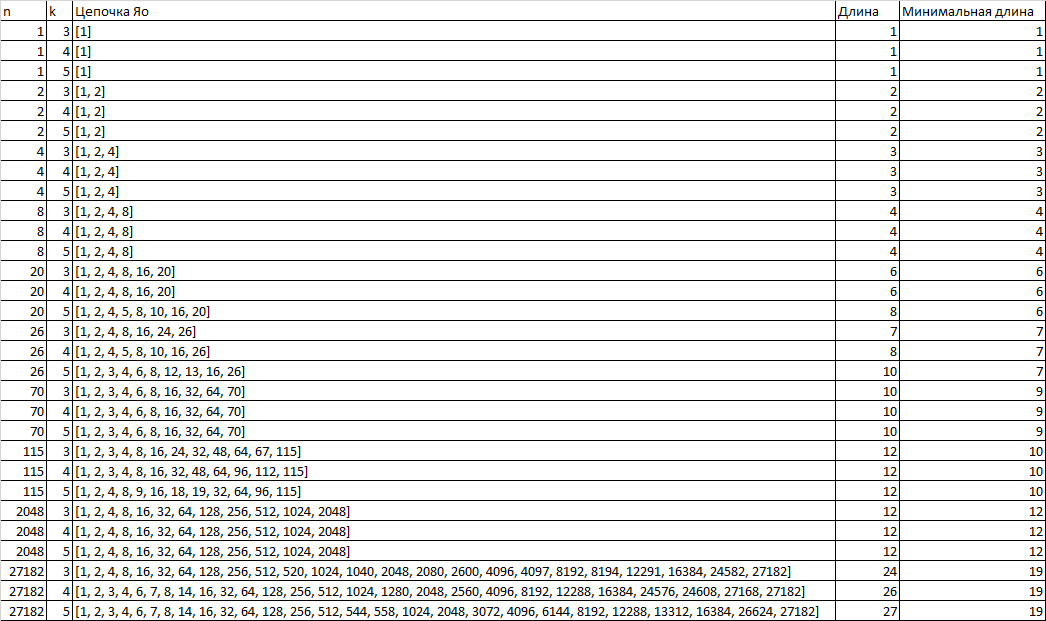

####Вывод:

Результаты работы программы варьируются в зависимости от использованного коэффициента k, при этом прямой зависимости работы для определенного числа от коэффициента нет, для каждого числа свой объективно оптимальный k.

###Алгоритм дробления вектора индексов

Реализуем алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа.

In [ ]:
import time
import math

def Ham(n):
    str=bin(n)
    res=0
    for i in str:
        if(i=='1'):
            res+=1
    return res

def searchForIndex(r, i0):
    max=i0+len(r)-1
    for i in range(1,len(r)+1):
        r[-i]+=1
        if(r[-i]<=max):
            break
        if(i==len(r)):
            r.append(1)
            break
        r[-i]=1
        max-=1

def chain(r):
    chRes=[1]
    for i in r:
        chRes.append(chRes[-1]+chRes[i-1])
    return chRes

def splitIndexAlg(n):
    ldown=math.ceil(math.log(n,2))
    lup=math.floor(math.log(n,2))+Ham(n)-1
    while(ldown<=lup):
        q=ldown//2
        if(q==0):
            q=1
        indexes = [1 for i in range(q)]
        while(len(indexes)==q):
            indexes2 = [1 for i in range(ldown-q)]
            ch=chain(indexes+indexes2)
            if(ch[-1]==n):
                return ch
            amax=ch[q]*pow(2,ldown-q)
            amin = ch[q] +ldown-q
            if(amin>n or amax<n):
                searchForIndex(indexes,1)
                continue
            while(len(indexes2)==ldown-q):
                ch=chain(indexes+indexes2)
                if(ch[-1]==n):
                    return ch
                searchForIndex(indexes2,q+1)
            searchForIndex(indexes,1)
        ldown+=1
    return ch

n=int(input())
startTime=time.time()
ch=splitIndexAlg(n)
endTime=time.time()
print(f"Result is: {ch}")
print(f"Length is: {len(ch)}")
print(f"Time: {float(endTime-startTime)}")

Протестируем алгоритм на примерах n>=500 и сравним с ранее реализованными методами(для алгоритма Яо возьмем k=3):

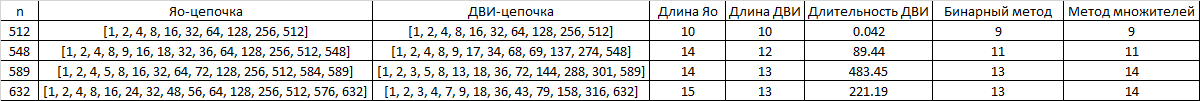

####Вывод:

Как мы видим на результатах, сравнивая четыре метода, можно заметить, что несмотря на идеальные результаты, метод дробления вектора индексов справляется с задачей за очень долгое время для n>=500, в то время как предыдущие алгоритмы справляются моментально. В зависимости от желания получить наиболее точную цепочку, можно выбрать для выполнения как метод ДВИ, так и ранее расмотренные методы. Использование того или иного метода напрямую зависит от вводимых чисел, так как в определенных случаях один алгоритм лучше/хуже другого в разных аспектах.

###Первое следствие теоремы Брауэра

Проверим следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов.

Создадим массив с результатами значения для всех n 1..200 алгоритмом ДВИ, вычислим для каждого значения ln(x) и yln(x)

In [ ]:
import pylab as plt

n = 201
results = [len(splitIndexAlg(i)) for i in range(1, n)]
x = [i for i in range(1, n)]
lnxi = [math.log(i, math.e) for i in range(1, n)]
lnx2i = [pow(math.log(i, math.e),2) for i in range(1, n)]
ylnxi = [results[i-1] * lnxi[i-1] for i in range(1, n)]

Используя функцию вида $y=a+bln(x)$ Получим результаты для отображения y

Коэффициенты:
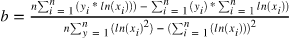


In [ ]:
b = (n*sum(ylnxi) - sum(results)*sum(lnxi))/(n*sum(lnx2i) - sum(lnxi)*sum(lnxi))
a = (sum(results) - b * sum(lnxi))/(n-1)

y = [a + b*lnxi[i-1] for i in range(1, n)]

plt.figure(figsize=(12, 8))
plt.scatter(x, results, color = 'red', marker = '.')
plt.plot(x, y)
plt.show()

График зависимости длины аддитивной цепочки от заданного числа:

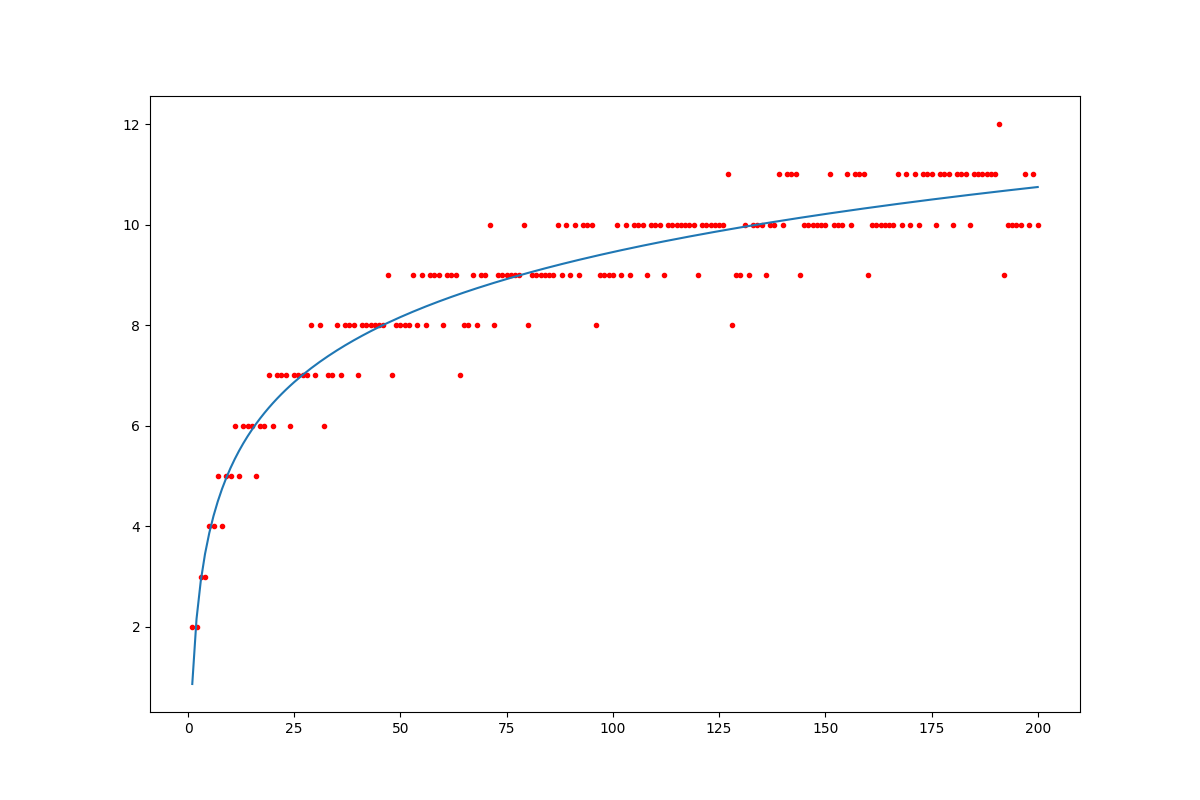

####Вывод:

Изучив график, мы можем явно сказать, что минимальные длины АЦ аппроксимируются логарифмической кривой при 1<=n<=200. Следовательно, первое следствие теоремы Брауэра справедливо $\lim_{x \to \infty} l(n)/\lambda(n)=1$.

###Гипотеза Шольца-Брауэра

Проверим также гипотезу Шольца-Брауэра для 1<n<10 с помощью алгоритма ДВИ, которая выдвигается как $l*(2^n-1)<=l*(n)+n-1$

In [ ]:
import time
import math
import pylab as plt
import numpy as np

def Ham(n):
    str=bin(n)
    res=0
    for i in str:
        if(i=='1'):
            res+=1
    return res

def searchForIndex(r, i0):
    max=i0+len(r)-1
    for i in range(1,len(r)+1):
        r[-i]+=1
        if(r[-i]<=max):
            break
        if(i==len(r)):
            r.append(1)
            break
        r[-i]=1
        max-=1

def chain(r):
    chRes=[1]
    for i in r:
        chRes.append(chRes[-1]+chRes[i-1])
    return chRes

def splitIndexAlg(n):
    ldown=math.ceil(math.log(n,2))
    lup=math.floor(math.log(n,2))+Ham(n)-1
    while(ldown<=lup):
        q=ldown//2
        if(q==0):
            q=1
        indexes = [1 for i in range(q)]
        while(len(indexes)==q):
            indexes2 = [1 for i in range(ldown-q)]
            ch=chain(indexes+indexes2)
            if(ch[-1]==n):
                return ch
            amax=ch[q]*pow(2,ldown-q)
            amin = ch[q] +ldown-q
            if(amin>n or amax<n):
                searchForIndex(indexes,1)
                continue
            while(len(indexes2)==ldown-q):
                ch=chain(indexes+indexes2)
                if(ch[-1]==n):
                    return ch
                searchForIndex(indexes2,q+1)
            searchForIndex(indexes,1)
        ldown+=1
    return ch


for n in range(2, 11):
    first = splitIndexAlg(pow(2,n) - 1)
    second = splitIndexAlg(n)

    if (len(first)<=len(second)+n-1):
        print(f"Гипотеза верна для n={n}.")
        print(f"l*(2^n-1)<=l*(n)+n-1")
        print(f"{len(first)}<={len(second)}+{n}-1")
    else:
        print(f"Гипотеза неверна для n={n}.")
        print(f"l*(2^n-1)>l*(n)+n-1")
        print(f"{len(first)}>{len(second)}+{n}-1")

Результат работы программы:

In [ ]:
Гипотеза верна для n=2.
l*(2^n-1)<=l*(n)+n-1
3<=2+2-1
Гипотеза верна для n=3.
l*(2^n-1)<=l*(n)+n-1
5<=3+3-1
Гипотеза верна для n=4.
l*(2^n-1)<=l*(n)+n-1
6<=3+4-1
Гипотеза верна для n=5.
l*(2^n-1)<=l*(n)+n-1
8<=4+5-1
Гипотеза верна для n=6.
l*(2^n-1)<=l*(n)+n-1
9<=4+6-1
Гипотеза верна для n=7.
l*(2^n-1)<=l*(n)+n-1
11<=5+7-1
Гипотеза верна для n=8.
l*(2^n-1)<=l*(n)+n-1
11<=4+8-1
Гипотеза верна для n=9.
l*(2^n-1)<=l*(n)+n-1
13<=5+9-1
Гипотеза верна для n=10.
l*(2^n-1)<=l*(n)+n-1
14<=5+10-1

####Вывод:

Проверив гипотезу, убедились, что гипотеза справедлива для чисел $2<=n<=10$, а значит, для вычисления длины цепочки $l*(2^n-1)$ нам достаточно найти длину цепочки $l*(n)$, прибавить $n$ и вычесть единицу

###Оптимизированный метод множителей

Оптимизируем метод множителей, используя не два простых числа, а всю факторизацию числа, тем самым приводя к тому, что вместо лишних дополнительных расчетов мы будем заменять число на другую переменную, тем самым избегая очередной операции. Реализация аналогичная обычному методу множителей, однако расширенная на все простые делители.

In [27]:
def binMethod(n):
    bin = []
    while n > 1:
        bin.append(n % 2)
        n //= 2
    bin.reverse()
    print(f"\t{bin}")
    result = 1
    ops = 0
    for i in bin:
        if i == 1:
            print(f"\tx^{result} * x^{result}")
            result = result + result
            print(f"\tx^{result} * x")
            result = result + 1
            ops += 2
        else:
            print(f"\tx^{result} * x^{result}")
            result = result + result
            ops += 1
    print(f"\tResult is: x^{result} with {ops} operations\n")
    return ops

for j in range(3):
    n=int(input())
    n2=n
    simple={}
    i=2
    nosimp = 1
    while(i!=n):
        if n%i==0:
            nosimp=0
            break
        else:
            i+=1
    n-=nosimp
    i=2
    while(n!=1):
        if n%(i)==0:
            if simple.get(i)==None:
                simple[i]=1
            else:
                simple[i]+=1
            n//=(i)
            i=2
        else:
            i+=1
    print(simple)
    ops=[]
    for j in simple.keys():
        print(f"Calculating for the multiplier({j}):")
        ops.append(binMethod(j)*simple[j])
    sum = 0
    sum2 = 0
    for i in ops:
        sum+=i
    for i in simple.values():
        sum2+=i
    if nosimp==1:
        print("+1 operation '*x', because of simple n")
    print(f"Result of all: x^{n2+nosimp} with {ops}+{nosimp}={sum+nosimp} operations and {sum2} replacements\n")

30
{2: 1, 3: 1, 5: 1}
Calculating for the multiplier(2):
	[0]
	x^1 * x^1
	Result is: x^2 with 1 operations

Calculating for the multiplier(3):
	[1]
	x^1 * x^1
	x^2 * x
	Result is: x^3 with 2 operations

Calculating for the multiplier(5):
	[0, 1]
	x^1 * x^1
	x^2 * x^2
	x^4 * x
	Result is: x^5 with 3 operations

Result of all: x^30 with [1, 2, 3]+0=6 operations and 3 replacements

548
{2: 2, 137: 1}
Calculating for the multiplier(2):
	[0]
	x^1 * x^1
	Result is: x^2 with 1 operations

Calculating for the multiplier(137):
	[0, 0, 0, 1, 0, 0, 1]
	x^1 * x^1
	x^2 * x^2
	x^4 * x^4
	x^8 * x^8
	x^16 * x
	x^17 * x^17
	x^34 * x^34
	x^68 * x^68
	x^136 * x
	Result is: x^137 with 9 operations

Result of all: x^548 with [2, 9]+0=11 operations and 3 replacements

632
{2: 3, 79: 1}
Calculating for the multiplier(2):
	[0]
	x^1 * x^1
	Result is: x^2 with 1 operations

Calculating for the multiplier(79):
	[0, 0, 1, 1, 1, 1]
	x^1 * x^1
	x^2 * x^2
	x^4 * x^4
	x^8 * x
	x^9 * x^9
	x^18 * x
	x^19 * x^19
	x^38 *

Сравним результаты работы методов:

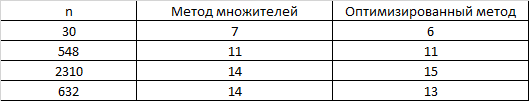

Тем не менее, в зависимости от числа метод множителей на всех простых числах может давать как и лучше результат, чем обычный метод множителей, так и хуже. 

###Выводы

В процессе выполнения лабораторной работы были получены знания о предмете аддитивных цепочек, возможные алгоритмы работы с ними. Также, были реализованы данные алгоритмы для нахождения минимальных и приблизительных аддитивных цепочек/их длин. Была изучена зависимость минимальных длин звездных цепочек от числа. 
Также, были получены знания и навыки использования системы компьютерной алгебры SageMath.
Были реализованы следующие алгоритмы:
1. Бинарный метод
2. Метод множителей и его дополненная версия
3. Алгоритм Яо
4. Алгоритм дробления вектора индекса

Также, помимо изучения на практике алгоритмов работы с аддитивными цепочками, было проверены:
1. Первое следствие теоремы Брауэра 
2. Гипотеза Шольца-Брауэра для n=1..10